# K-Means Clustering Practice


## Import and Env. Setting

### import
- pandas: Data conversion CSV to DataFrame
- sklearn
  - StnadardScaler: Data normalization
  - KMeans: KMeans Algorithm
- matplotlib
- seaboarn
- numpy
- google.colab
- os

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
import os

Mounted at /content/drive


## Implementation

In [ ]:
# Testing
directory_path = '/content/drive/MyDrive/CSVs/JejuWeather'
csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]

data = pd.read_csv(os.path.join(directory_path, csv_files[0]))
data.drop(columns=['baseDate', 'observatoryName'], inplace=True)
features = data.columns
# Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

optimal_k = 10
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
data['Cluster'] = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(12, 8))
sns.pairplot(data, hue='Cluster', palette='viridis')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

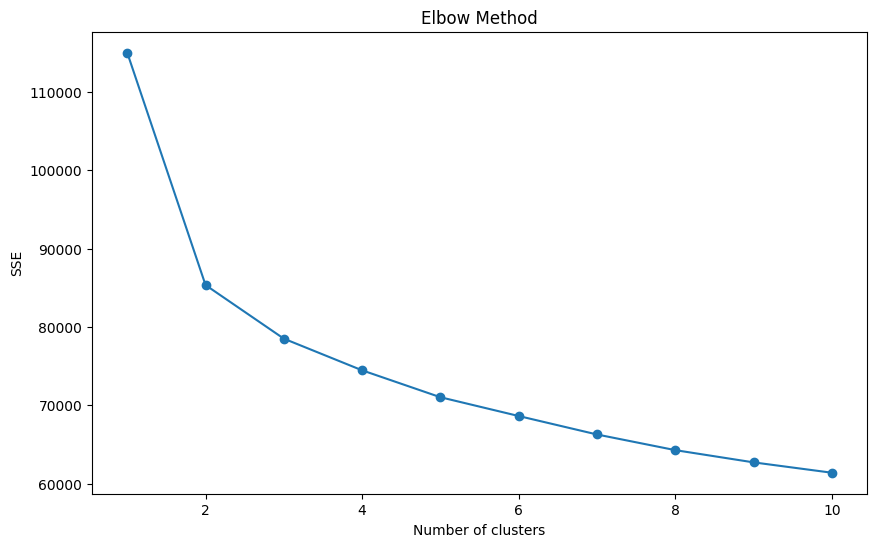

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [55]:
directory_path = '/content/drive/MyDrive/CSVs/JejuWeather'
vector_dirs = directory_path + '/Kmeans-data'
if (not os.path.exists(vector_dirs)):
  os.makedirs(vector_dirs)
csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]

data = pd.read_csv(os.path.join(directory_path, csv_files[0])).sort_values('baseDate')
columns = ['averageTemperature', 'lowestTemperature', 'lowestTemperatureTime', 'highestTemperature', 'highestTemperatureTime', 'dailyRainfall', 'maximumWindSpeed', 'maximumWindSpeedTime', 'averageWindSpeed', 'maximumWindSpeedDirection']

prev_day_1 = data[columns].shift(1)
prev_day_2 = data[columns].shift(2)
prev_day_3 = data[columns].shift(3)


combined_data = pd.concat([data['baseDate'], prev_day_1.add_suffix('_prev1'), prev_day_2.add_suffix('_prev2'), prev_day_3.add_suffix('_prev3')], axis=1)
combined_data = combined_data.dropna()
combined_data = combined_data.reset_index(drop=True)

# KMeans
# Normalize data

# Select features
features = combined_data.drop(columns=['baseDate'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
combined_data['Cluster'] = kmeans.fit_predict(scaled_data)

In [72]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
combined_data['Cluster'] = kmeans.fit_predict(scaled_data)

cluster_counts = combined_data['Cluster'].value_counts()
print(cluster_counts)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster
0    1390
1    1338
2    1105
Name: count, dtype: int64


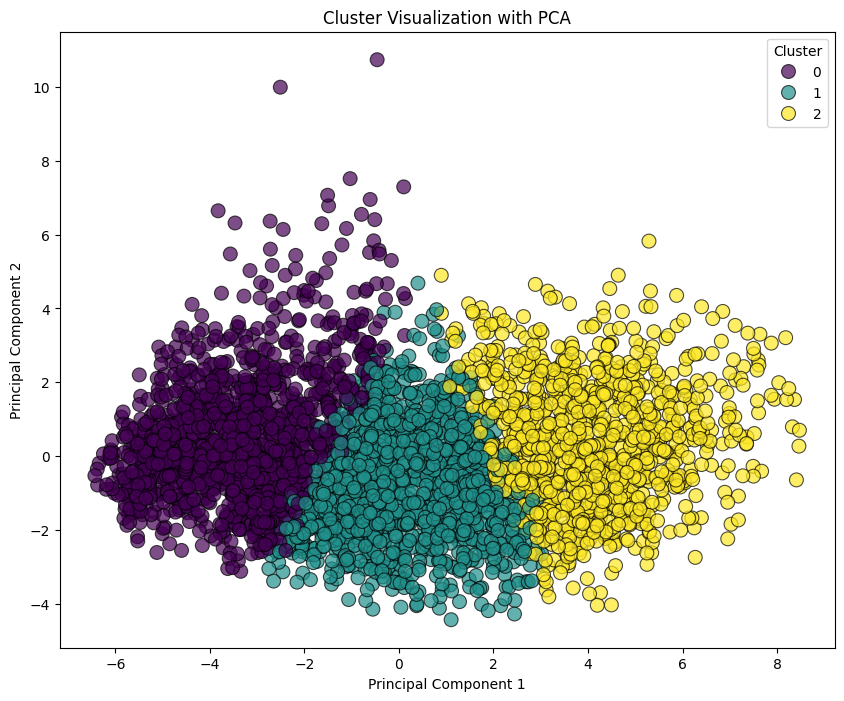

In [73]:
# Visualization
from sklearn.decomposition import PCA


pca = PCA(n_components=2)

reduced_data = pca.fit_transform(scaled_data)
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_df['Cluster'] = combined_data['Cluster']

# Set up the plot
plt.figure(figsize=(10, 8))

# Create a scatter plot
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=reduced_df, s=100, alpha=0.7, edgecolor='k')

# Add titles and labels
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.show()
